In [1]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.decomposition import PCA
import matplotlib.colors as colors
import matplotlib.pyplot as plt
!pip3 install xlrd

# Import the data set
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls', header=1)

In [2]:
#Explore the first ten rows of the data set
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [3]:
# Rename the columns
df.rename({'default payment next month': 'DEFAULT'}, axis='columns', inplace=True)

#Remove the ID column as it is not informative
df.drop('ID', axis=1, inplace=True)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# check dimensions for invalid values
df['SEX'].unique()
df['MARRIAGE'].unique()
df['EDUCATION'].unique()
df['AGE'].unique()

# count missing or null values
print(len(df[pd.isnull(df.SEX)]))
print(len(df[pd.isnull(df.MARRIAGE)]))
print(len(df[pd.isnull(df.EDUCATION)]))
print(len(df[pd.isnull(df.AGE)]))

#count of missing data
len(df.loc[(df['EDUCATION'] == 0) | (df['MARRIAGE'] == 0)]) #output: 68


0
0
0
0


68

In [5]:
#Filter the DataFrame
df_no_missing_data = df.loc[(df['EDUCATION'] != 0) & (df['MARRIAGE'] != 0)]


/tmp/ipython-input-4269095223.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = df_no_missing_data['DEFAULT'], palette = 'rocket')


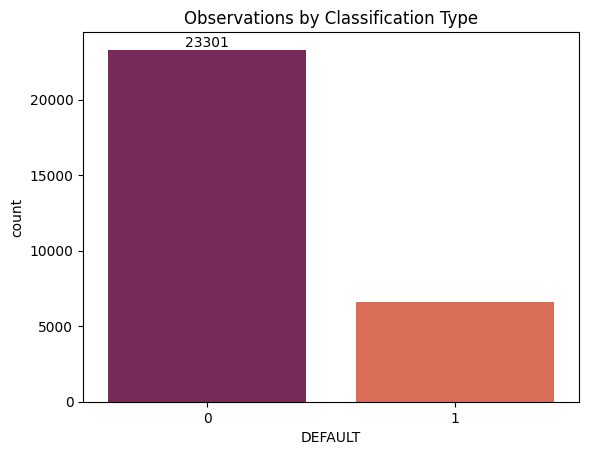

In [6]:
# Explore distribution of data set
# count plot on ouput variable
ax = sns.countplot(x = df_no_missing_data['DEFAULT'], palette = 'rocket')

#add data labels
ax.bar_label(ax.containers[0])

# add plot title
plt.title("Observations by Classification Type")

# show plot
plt.show()


In [7]:
from sklearn.utils import resample

# split data
df_no_default = df_no_missing_data.loc[(df_no_missing_data['DEFAULT']==0)]
df_default = df_no_missing_data.loc[(df_no_missing_data['DEFAULT']==1)]

# downsample the data set
df_no_default_downsampled = resample(df_no_default, replace=False, n_samples=1000, random_state=42 )
df_default_downsampled = resample(df_default, replace=False, n_samples=1000, random_state=42 )

#check ouput
len(df_no_default_downsampled)
len(df_default_downsampled)

# merge the data sets
df_downsample = pd.concat([df_no_default_downsampled, df_default_downsampled ])
len(df_downsample)


2000

In [9]:
from sklearn.preprocessing import OneHotEncoder
# isolate independent variables
X = df_downsample.drop('DEFAULT', axis=1).copy()

ohe = OneHotEncoder(sparse_output=False, dtype="int")
ohe.fit(X[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']])
X_ohe_train = ohe.transform(X[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']])

X_ohe_train

transformed_ohe = pd.DataFrame(
    data=X_ohe_train,
    columns=ohe.get_feature_names_out(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']),
    index=X.index,
)
transformed_ohe.head()

# merge dataframes
X_encoded = pd.concat([X, transformed_ohe], axis=1)
X_encoded


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_5_7,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7
641,130000,2,3,1,28,0,0,0,0,-2,...,0,1,0,0,0,0,0,0,0,0
4678,170000,1,3,1,29,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
16004,180000,2,2,1,29,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
22974,210000,2,2,2,32,-2,-2,-2,-2,-2,...,0,1,0,0,0,0,0,0,0,0
17535,190000,2,3,1,45,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6154,30000,2,1,2,34,1,2,2,2,2,...,0,0,0,0,1,0,0,0,0,0
14072,320000,1,1,1,43,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5387,50000,1,2,2,23,-1,-1,0,0,-1,...,0,0,1,0,0,0,0,0,0,0
23192,150000,2,3,1,43,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [11]:
from sklearn.preprocessing import scale
y = df_downsample['DEFAULT'].copy()
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

#scale the data
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)


Accuracy: 68.50%


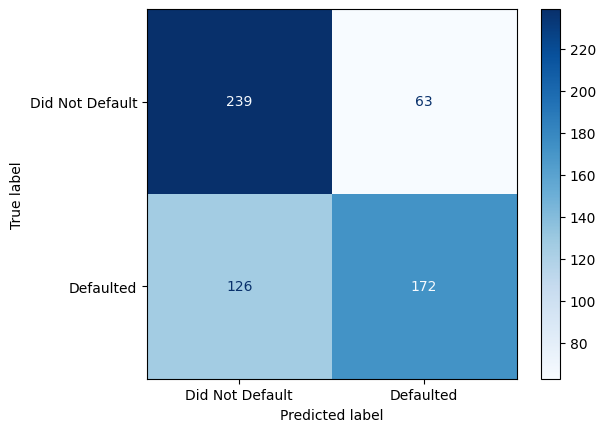

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

clf_svm = SVC(random_state = 42)
clf_svm.fit(X_train_scaled, y_train)

#calculate overall accuracy
y_pred = clf_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

class_names = ['Did Not Default', 'Defaulted']
disp = ConfusionMatrixDisplay.from_estimator(
        clf_svm,
        X_test_scaled,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.682 total time=   0.1s
[CV 2/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.689 total time=   0.1s
[CV 3/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.725 total time=   0.1s
[CV 4/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.714 total time=   0.1s
[CV 5/5] END ....C=0.5, gamma=scale, kernel=rbf;, score=0.707 total time=   0.1s
[CV 1/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.525 total time=   0.1s
[CV 2/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.561 total time=   0.1s
[CV 3/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.536 total time=   0.1s
[CV 4/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.582 total time=   0.2s
[CV 5/5] END ........C=0.5, gamma=1, kernel=rbf;, score=0.554 total time=   0.2s
[CV 1/5] END ......C=0.5, gamma=0.1, kernel=rbf;, score=0.586 total time=   0.2s
[CV 2/5] END ......C=0.5, gamma=0.1, kernel=rbf

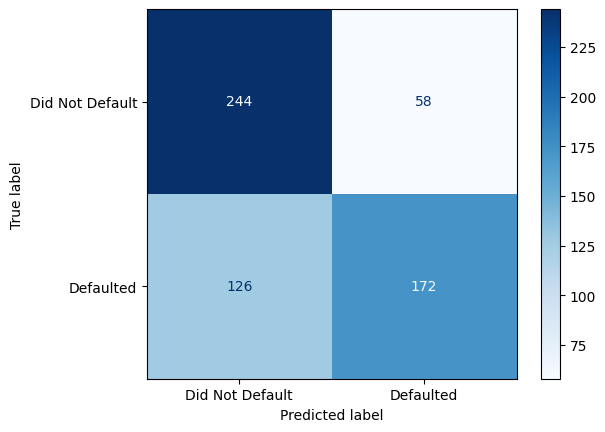

In [13]:
param_grid = {'C':[0.5,0.1,1,10,100,1000],
              'gamma':['scale', 1,0.1, 0.01,0.001,0.0001],
              'kernel':['rbf']}

optimal_params = GridSearchCV(SVC(), param_grid, cv = 5, scoring='accuracy', verbose=3)
optimal_params.fit(X_train_scaled, y_train)

# see "best" parameters
optimal_params.best_params_

# refit model with optimal hyperparameters
grid_predictions = optimal_params.predict(X_test.values)
clf_svm = SVC(random_state = 42, C=.5, gamma=0.01)
clf_svm.fit(X_train_scaled, y_train)

#calculate overall accuracy
y_pred = clf_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

# plot confusion matrix
class_names = ['Did Not Default', 'Defaulted']
disp = ConfusionMatrixDisplay.from_estimator(
        clf_svm,
        X_test_scaled,
        y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues)


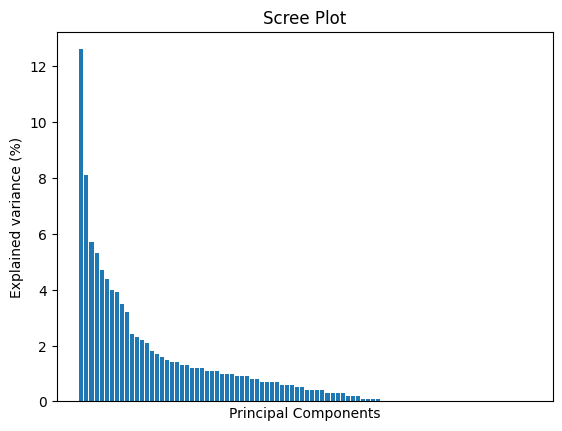

In [14]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]

#plot scree plot
plt.bar(x=range(1, len(per_var)+1), height=per_var)
plt.tick_params(axis='x', which = 'both', bottom=False, top=False, labelbottom=False)
plt.ylabel("Explained variance (%)")
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()


In [15]:
train_pc1_coords = X_train_pca[:, 0]
train_pc2_coords = X_train_pca[:, 1]

pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

param_grid = {'C':[0.01, 0.1, 0.5, 1, 10, 100],
              'gamma':[1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
              'kernel':['rbf']}
optimal_params = GridSearchCV(SVC(), param_grid, cv = 5, scoring='accuracy', verbose=3)

optimal_params.fit(pca_train_scaled, y_train)


Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.661 total time=   0.1s
[CV 2/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.661 total time=   0.1s
[CV 3/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.686 total time=   0.1s
[CV 4/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.611 total time=   0.1s
[CV 5/5] END .......C=0.01, gamma=1, kernel=rbf;, score=0.696 total time=   0.1s
[CV 1/5] END ....C=0.01, gamma=0.75, kernel=rbf;, score=0.664 total time=   0.1s
[CV 2/5] END ....C=0.01, gamma=0.75, kernel=rbf;, score=0.657 total time=   0.1s
[CV 3/5] END ....C=0.01, gamma=0.75, kernel=rbf;, score=0.671 total time=   0.1s
[CV 4/5] END ....C=0.01, gamma=0.75, kernel=rbf;, score=0.614 total time=   0.1s
[CV 5/5] END ....C=0.01, gamma=0.75, kernel=rbf;, score=0.686 total time=   0.1s
[CV 1/5] END .....C=0.01, gamma=0.5, kernel=rbf;, score=0.661 total time=   0.1s
[CV 2/5] END .....C=0.01, gamma=0.5, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 10, 100],
                         'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

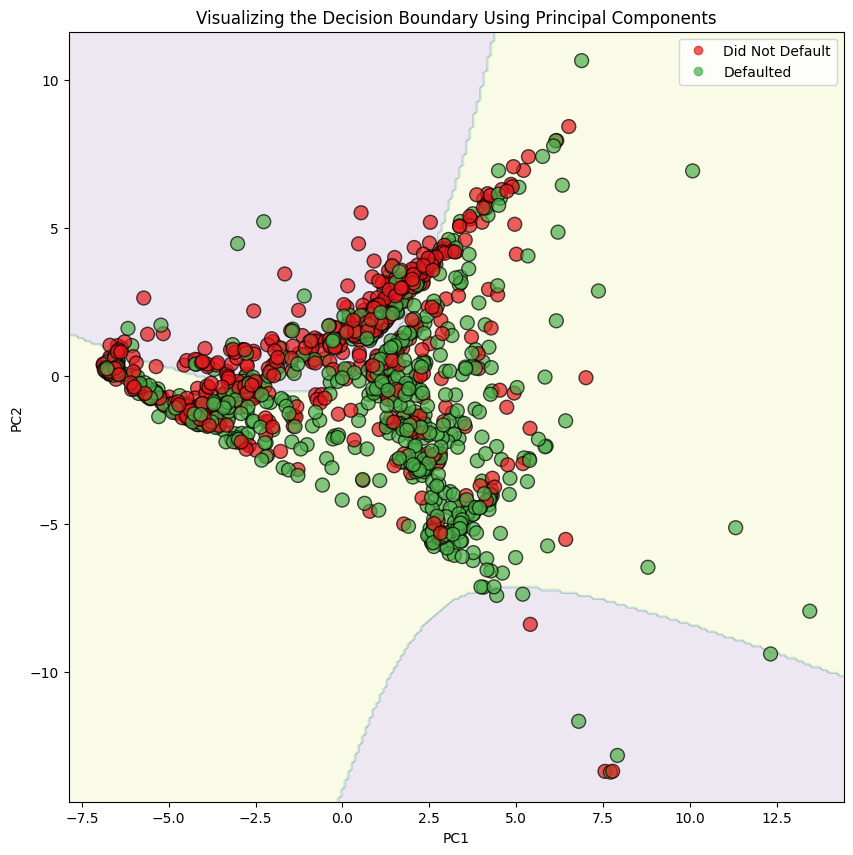

In [16]:
clf_svm = SVC(random_state=42, C=1000, gamma=0.001)
clf_svm.fit(pca_train_scaled, y_train)

X_test_pca = pca.transform(X_train_scaled)
test_pc1_coords = X_test_pca[:, 0]
test_pc2_coords = X_test_pca[:, 1]

x_min = test_pc1_coords.min()-1
x_max = test_pc1_coords.max()+1
y_min = test_pc2_coords.min()-1
y_max = test_pc2_coords.max()+1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),np.arange(start=y_min, stop=y_max, step=0.1) )

Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
Z = Z.reshape(xx.shape)

# visualizing the data
fig, ax = plt.subplots(figsize=(10,10))
ax.contourf(xx,yy, Z, alpha=0.1)
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_train, cmap=cmap, s=100, edgecolors='k', alpha=0.7)
legend = ax.legend(scatter.legend_elements()[0], scatter.legend_elements()[1], loc='upper right')
legend.get_texts()[0].set_text('Did Not Default')
legend.get_texts()[1].set_text('Defaulted')
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Visualizing the Decision Boundary Using Principal Components')
plt.show()
